# Clustering on Image data
We know machine learning only accepts numeric data. Images are essentially a numeric matrices. Images are basically pixels and they contain RGB values. Hence we can perform clustering on them.

We will use KMeans and minibatch kmeans algorithm to cluster the image  
dataset : http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [2]:
mnist_data = pd.read_csv("datasets/train.csv")
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The image seems to be 28 by 28 pixel grayscale

In [3]:
mnist_data.shape

(42000, 785)

In [5]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
mnist_features = mnist_data.drop('label',axis=1)

In [7]:
mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_labels = mnist_data['label']

In [24]:
def display_image(index):
    print("Digit: ", mnist_labels[index])
    plt.imshow(mnist_features.loc[index].values.reshape(28,28))

Digit:  0


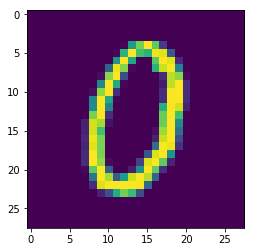

In [25]:
display_image(5)

In [32]:
kmeans_model = KMeans(n_clusters=10,max_iter=1000).fit(mnist_features)

In [33]:
mnist_test = mnist_data.sample(10,replace=False)
mnist_test_features = mnist_test.drop('label',axis=1)
mnist_test_labels = mnist_test['label']

In [34]:
mnist_test_labels

29842    2
16138    6
10145    2
31414    4
13513    8
34904    0
33407    8
22632    6
28901    7
31084    7
Name: label, dtype: int64

In [35]:
mnist_test_labels = np.array(mnist_test_labels)
mnist_test_labels

array([2, 6, 2, 4, 8, 0, 8, 6, 7, 7], dtype=int64)

In [36]:
pred_clusters = kmeans_model.predict(mnist_test_features)

In [37]:
pred_results = pd.DataFrame({'actual digit': mnist_test_labels,'pred_cluster':pred_clusters})
pred_results

,actual digit,pred_cluster
0,2,6
1,6,5
2,2,0
3,4,2
4,8,1
5,0,3
6,8,8
7,6,5
8,7,0
9,7,0


It seems that digit 7 and 2 got assigned to the same cluster and the rest of the numbers are on different cllusters. It is not bad.